In [1]:
#In this project we will be developing a neural network 
#To predict disease diagnosis in the cornary artery

import sys
import pandas as pd
import numpy as np
import sklearn 
import matplotlib
import keras


Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
#Begin importing dataset 
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"\

#import as a pandas dataframe
#define each column as name (attributes)

names= ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']

#read the csv file and map it to the above colunmn names

clevland=pd.read_csv(url, names=names)

#print some properties of the data

print(clevland.shape)
print (clevland.loc[1])

#Printed below is a sample patient who has heart disease 
#Numbers 1-4 indicate indivduals with varying degrees of heafrt disease 


(303, 14)
age          67
sex           1
cp            4
trestbps    160
chol        286
fbs           0
restecg       2
thalach     108
exang         1
oldpeak     1.5
slope         2
ca          3.0
thal        3.0
class         2
Name: 1, dtype: object


In [4]:
#print last twenty or so data point
clevland.loc[20:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
20,64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0
21,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0
22,58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
23,58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3
24,60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
25,50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
26,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
27,66.0,0.0,1.0,150.0,226.0,0.0,0.0,114.0,0.0,2.6,3.0,0.0,3.0,0
28,43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,0
29,40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3


In [5]:
#There is some missing data in the dataset
#In our data preprocessing we are going to nhave to take care of the missing
#data

data= clevland[~clevland.isin(['?'])]
print(data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0     140.0  294.0  0.0      2.0  

In [6]:
#Drop rows with NaN values from the data frame
data= data.dropna(axis=0)
data.loc[200:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
200,50.0,0.0,4.0,110.0,254.0,0.0,2.0,159.0,0.0,0.0,1.0,0.0,3.0,0
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0,0
203,64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0,0
204,43.0,1.0,4.0,110.0,211.0,0.0,0.0,161.0,0.0,0.0,1.0,0.0,7.0,0
205,45.0,1.0,4.0,142.0,309.0,0.0,2.0,147.0,1.0,0.0,2.0,3.0,7.0,3
206,58.0,1.0,4.0,128.0,259.0,0.0,2.0,130.0,1.0,3.0,2.0,2.0,7.0,3
207,50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,3
208,55.0,1.0,2.0,130.0,262.0,0.0,0.0,155.0,0.0,0.0,1.0,0.0,3.0,0
209,62.0,0.0,4.0,150.0,244.0,0.0,0.0,154.0,1.0,1.4,2.0,0.0,3.0,1


In [7]:
#Print the shape of the dataset again
print (data.shape)
print(data.dtypes)

#Find the datatypes of each of the attributes to each patient 

(297, 14)
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


In [8]:
#transform all data to numerical data such that there are no objects

data= data.apply(pd.to_numeric)
print (data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


In [9]:
 #Describe the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


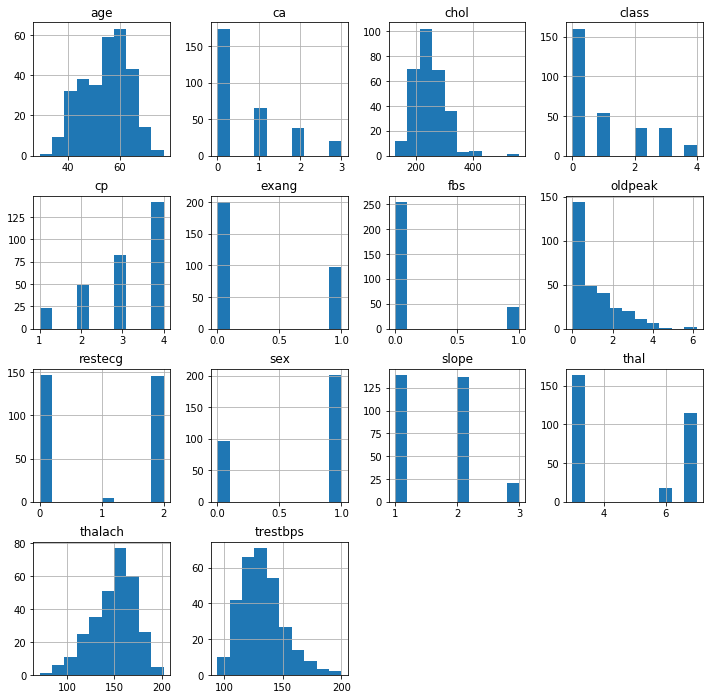

In [10]:
#plot histograms for all of the variables
data.hist(figsize = (12,12))
plt.show()

In [11]:
#Split dataset to split data into trainging and testing data

#Create X and Y data sets for training 

from sklearn import model_selection
X = np.array(data.drop(['class'],1))
y= np.array(data['class'])

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                 y,test_size=0.2)


In [12]:
print(y_test[:10])
#Below are sample values for the class column

[0 0 1 0 1 2 1 0 3 0]


In [13]:
#Convert values above to categorical data
from keras.utils.np_utils import to_categorical
Y_train= to_categorical(y_train, num_classes=None)
Y_Test= to_categorical(y_test, num_classes=None)

print Y_train.shape
print Y_train[:10]

(237, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Fit the model to the trainging data
#epochs are one time through all of the training 
#batch size is the number of instances to look at before recompling the 
#parameters

model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose = 1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
